## Description

Have you ever wondered how companies like Facebook and Google are able to serve you surprisingly targeted ads that you occasionally click? Well, behind the scenes, they are running sophisticated machine learning models and using rich user data to predict the click-through rate (CTR) for every user who sees those ads. 

## Introduction to CTR and Basic Techniques

The target variable will be in the click column. The hour is in a YYMMDDHH format, and there are a few integer columns: device_type for the type of device, banner_pos for the position of a banner ad (also known as a display ad), etc.

In [53]:
import pandas as pd

df = pd.read_csv('sample_data.csv')

In [54]:
# Look at basics of Dataframe 
print(df.head(5))
print(df.columns)

# Define X and y
X = df.loc[:, ~df.columns.isin(['click'])]
y = df.click

# Sample CTR
print("Sample CTR :\n", 
      y.sum()/len(y))

   Unnamed: 0  click      hour    C1  banner_pos  device_type  \
0           0      0  14102100  1005           0            1   
1           1      0  14102100  1005           0            1   
2           2      0  14102100  1005           0            1   
3           3      0  14102100  1005           0            1   
4           4      0  14102100  1005           1            1   

   device_conn_type    C14  C15  C16   C17  C18  C19     C20  C21  \
0                 2  15706  320   50  1722    0   35      -1   79   
1                 0  15704  320   50  1722    0   35  100084   79   
2                 0  15704  320   50  1722    0   35  100084   79   
3                 0  15706  320   50  1722    0   35  100084   79   
4                 0  18993  320   50  2161    0   35      -1  157   

      device_model_int  
0 -4536565594672005814  
1   -80052322344914806  
2 -3130634972019121531  
3 -8587292268327570678  
4 -7699311560514132401  
Index(['Unnamed: 0', 'click', 'hour', 'C1', 

**Note that the percentage of values of y which are 1 is above 10% - in practice for real life click-through rates, that percentage is in the small single digits range.**

In [55]:
# Distribution of values for device type
print("Distribution of device type: ")
print(X.device_type.value_counts()/len(X))

# Sample CTR by device type 
print("CTR by device type: ")
print(df.groupby('device_type')['click'].sum()/len(y))

Distribution of device type: 
1    0.92597
0    0.04212
4    0.02979
5    0.00212
Name: device_type, dtype: float64
CTR by device type: 
device_type
0    0.00958
1    0.16295
4    0.00216
5    0.00021
Name: click, dtype: float64


In [56]:
# Distribution of values for banner position
print("Distribution of banner position: ")
print(X.banner_pos.value_counts()/len(X))

# Sample CTR by banner position
print("CTR by banner position: ")
print(df.groupby('banner_pos')['click'].sum()/len(y))

Distribution of banner position: 
0    0.80249
1    0.19714
2    0.00021
5    0.00010
4    0.00006
Name: banner_pos, dtype: float64
CTR by banner position: 
banner_pos
0    0.13599
1    0.03883
2    0.00003
4    0.00001
5    0.00004
Name: click, dtype: float64


**For both device type and banner position, notice that a significant portion of values seem to be in a particular category, and that there seems to be a particular breakdown that has a significantly higher CTR than the other values.**

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [58]:
# Define training and testing
X_train, X_test, y_train, y_test = \
	train_test_split(X, y, test_size = .2, random_state = 0)

# Create decision tree classifier
clf = DecisionTreeClassifier()

# Train classifier - predict label and evaluate accuracy
y_pred = clf.fit(X_train, y_train).predict(X_test) 
print(accuracy_score(y_test, y_pred))

0.7408


**Notice that our accuracy is only around 89%.**

In [59]:
from sklearn.metrics import roc_curve, auc

In [60]:
# Train classifier - predict probability score and label
y_score = clf.fit(X_train, y_train).predict_proba(X_test) 
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Get ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.5535928169881492


**Notice that the AUC metric for our ROC curve is > 0.50, which indicates an improvement over a baseline classifier (which has a default AUC of 0.50). With some more exploration of techniques and other models, we will further improve our model for CTR prediction.**

In [61]:
# Print columns
print(df.columns)

# Print data types of columns
print(df.dtypes)

# Select and print numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])
print(numeric_df.columns)

# Select and print categorical columns 
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.columns)

Index(['Unnamed: 0', 'click', 'hour', 'C1', 'banner_pos', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'device_model_int'],
      dtype='object')
Unnamed: 0          int64
click               int64
hour                int64
C1                  int64
banner_pos          int64
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
device_model_int    int64
dtype: object
Index(['Unnamed: 0', 'click', 'hour', 'C1', 'banner_pos', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'device_model_int'],
      dtype='object')
Index([], dtype='object')


**Note that there seems to be mostly numerical columns. Some of these columns are actually not numerical though, as we will discuss later.**

### Checking for missing values

In [62]:
# Print info
print(df.info())

# Print missing values by column 
print(df.isnull().sum(axis = 0))

# Print total number of missing values in rows
print(df.isnull().sum(axis = 1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Unnamed: 0        100000 non-null  int64
 1   click             100000 non-null  int64
 2   hour              100000 non-null  int64
 3   C1                100000 non-null  int64
 4   banner_pos        100000 non-null  int64
 5   device_type       100000 non-null  int64
 6   device_conn_type  100000 non-null  int64
 7   C14               100000 non-null  int64
 8   C15               100000 non-null  int64
 9   C16               100000 non-null  int64
 10  C17               100000 non-null  int64
 11  C18               100000 non-null  int64
 12  C19               100000 non-null  int64
 13  C20               100000 non-null  int64
 14  C21               100000 non-null  int64
 15  device_model_int  100000 non-null  int64
dtypes: int64(16)
memory usage: 12.2 MB
None
Unnamed: 0       

**Note that since there are no missing values by columns or rows, we can move on and continue analyzing our data.**

## Distributions by CTR

In [63]:
df.rename(columns = {"C1": "search_engine_type"}, inplace=True)

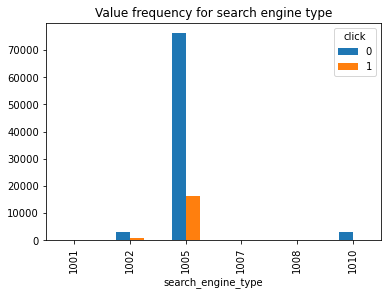

click  search_engine_type   clicks    total       CTR
0                    1001      3.0     29.0  0.103448
1                    1002    958.0   4212.0  0.227445
2                    1005  16288.0  92454.0  0.176174
3                    1007      NaN      NaN       NaN
4                    1008      4.0     10.0  0.400000
5                    1010    237.0   3191.0  0.074271


In [64]:
# Construct bar chart for clicks by search engine type
from matplotlib import pyplot as plt

se_df = df.groupby(['search_engine_type', 'click']).size().unstack()
se_df.plot(kind = 'bar', title = 'Value frequency for search engine type')
plt.show()

# Reset index and rename columns
se_df = se_df.reset_index()
se_df.rename(columns = {0: 'non_clicks', 1: 'clicks'}, inplace = True)

# Compute CTR using clicks and non clicks
se_df['total'] = se_df['clicks'] + se_df['non_clicks']
se_df['CTR'] = se_df['clicks'] / se_df['total']

# Print CTR by search engine type
print(se_df[['search_engine_type', 'clicks', 'total', 'CTR']])

**Note the most of the search engine type values are one particular value (category 1005) - which may represent Google. Also, it appears that CTR varies by search engine type value (highest for the category 1002), similar to the case with device type and banner position values. Therefore, it is likely useful for predicting CTR and should be included in future prediction models.**

In [65]:
df['hour'] = pd.to_datetime(df['hour'], format = '%y%m%d%H')

In [66]:
# Get categorical columns
categorical_cols = df.select_dtypes(
  include = ['object']).columns.tolist()
print("Categorical columns: ")
print(categorical_cols)

# Iterate over categorical columns and apply hash function
for col in categorical_cols:
	df[col] = df[col].apply(lambda x: hash(x))

# Print examples of new output
print(df.head(5))

Categorical columns: 
[]
   Unnamed: 0  click       hour  search_engine_type  banner_pos  device_type  \
0           0      0 2014-10-21                1005           0            1   
1           1      0 2014-10-21                1005           0            1   
2           2      0 2014-10-21                1005           0            1   
3           3      0 2014-10-21                1005           0            1   
4           4      0 2014-10-21                1005           1            1   

   device_conn_type    C14  C15  C16   C17  C18  C19     C20  C21  \
0                 2  15706  320   50  1722    0   35      -1   79   
1                 0  15704  320   50  1722    0   35  100084   79   
2                 0  15704  320   50  1722    0   35  100084   79   
3                 0  15706  320   50  1722    0   35  100084   79   
4                 0  18993  320   50  2161    0   35      -1  157   

      device_model_int  
0 -4536565594672005814  
1   -80052322344914806  
2 -3

In [69]:
from sklearn.metrics import confusion_matrix

# Set up classifier using training data to predict test data
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size = .2, random_state = 0)
clf = DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Define confusion matrix and four categories
conf_matrix = confusion_matrix(y_test, y_pred)
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

print("TN: %s, FP: %s, FN: %s, TP: %s" %(tn, fp, fn, tp))

TN: 13875, FP: 2658, FN: 2531, TP: 936


**Notice that the largest category is TN (model predicts no click, and actual was no click), which makes sense because our model will mostly predict non-click.**

In [72]:
import numpy as np

# Compute confusion matrix and get four categories
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate total return, total spent, and ROI
r = 0.2
cost = 0.05
total_return = round(tp * r,2)
total_cost = round((tp + fp) * cost,2) 
roi = round(total_return / total_cost,2)
print("Total return: %s, Total cost: %s, ROI: %s" %(
  total_return, total_cost, roi))

Total return: 187.2, Total cost: 179.7, ROI: 1.04


In [73]:
from sklearn.metrics import precision_score, recall_score

In [74]:
# Create classifier and make predictions
clf = DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Evaluate precision and recall
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))

Precision: 0.7434019051814059, Recall: 0.73985


**The precision value is the proportion of clicks relative to total number of impressions, and recall is the proportion of clicks gotten of all clicks available. Both are around 70-75%!**

In [76]:
# Set up baseline predictions
y_pred = np.asarray([0 for x in range(len(X_test))])

# Look at confusion matrix
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

# Check precision and recall
prec = precision_score(y_test, y_pred, average = 'weighted', zero_division=False)
recall = recall_score(y_test, y_pred, average = 'weighted', zero_division=False)
print("Precision: %s, Recall: %s" %(prec, recall))

Confusion matrix: 
[[16533     0]
 [ 3467     0]]
Precision: 0.6833502225, Recall: 0.82665


**Notice that the number of true and false positives are both 0, which is expected by design. Also note that the recall here was 83% simply due to the imbalanced nature of the dataset.**

In [78]:
# Create and fit classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Calculate total return, total spent, and ROI 
r, cost = 0.2, 0.05
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
total_return = tp * r
total_spent = (tp + fp) * cost 
roi = total_return / total_spent
print("Total return: %s, Total spent: %s, ROI: %s" %(total_return, total_spent, roi))

Total return: 367.8, Total spent: 511.3, ROI: 0.7193428515548602


In [79]:
# Create and fit decision tree classifier
clf = DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Calculate total return, total spent, and ROI 
r, cost = 0.2, 0.05
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
total_return = tp * r
total_spent = (tp + fp) * cost 
roi = total_return / total_spent
print("Total return: %s, Total spent: %s, ROI: %s" %(total_return, total_spent, roi))

Total return: 186.60000000000002, Total spent: 179.9, ROI: 1.0372429127292941


**Notice that the logistic regression classifier had total return of 0 and total spend of 0 - this is because it predicted only 0's, similar to the baseline classifier. Using a decision tree classifier, we see that the ROI > 1.**

In [80]:
# Iterate over different levels of max depth
for max_depth_val in [2, 3, 5, 10, 15, 20]:
  # Create and fit model
  clf = DecisionTreeClassifier(max_depth = max_depth_val)
  print("Evaluating tree with max_depth = %s" %(max_depth_val))
  y_pred = clf.fit(X_train, y_train).predict(X_test) 
  
  # Evaluate confusion matrix, precision, recall
  print("Confusion matrix: ")
  print(confusion_matrix(y_test, y_pred))
  prec = precision_score(y_test, y_pred, average = 'weighted')
  recall = recall_score(y_test, y_pred, average = 'weighted')
  print("Precision: %s, Recall: %s" %(prec, recall))

Evaluating tree with max_depth = 2
Confusion matrix: 
[[16533     0]
 [ 3467     0]]


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.6833502225, Recall: 0.82665
Evaluating tree with max_depth = 3
Confusion matrix: 
[[16089   444]
 [ 2984   483]]
Precision: 0.7876408651345869, Recall: 0.8286
Evaluating tree with max_depth = 5
Confusion matrix: 
[[16209   324]
 [ 3111   356]]
Precision: 0.784292635641213, Recall: 0.82825
Evaluating tree with max_depth = 10
Confusion matrix: 
[[16137   396]
 [ 3075   392]]
Precision: 0.7805745553619723, Recall: 0.82645
Evaluating tree with max_depth = 15
Confusion matrix: 
[[15800   733]
 [ 2948   519]]
Precision: 0.7685246549919531, Recall: 0.81595
Evaluating tree with max_depth = 20
Confusion matrix: 
[[15397  1136]
 [ 2926   541]]
Precision: 0.750564944961172, Recall: 0.7969


In [83]:
# Create model 
clf = DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score, KFold

# Set up k-fold
k_fold = KFold(n_splits = 4, random_state = 0, shuffle=True)

# Evaluate precision and recall for each fold
precision = cross_val_score(
  clf, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
recall = cross_val_score(
  clf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
print("Precision scores: %s" %(precision)) 
print("Recall scores: %s" %(recall))

Precision scores: [0.73683843 0.74253918 0.74639319 0.73882049]
Recall scores: [0.73305 0.73755 0.7378  0.73225]


**The recall levels are fairly close to one another - showing that the testing split did not affect the classifier's results. In real-life settings, the practical takeaway is that using cross validation is very powerful for large datasets since you want to avoid overfitting and different splits will likely give differen results.**

In [85]:
# Iterate over different levels of max depth and set up k-fold
for max_depth_val in [3, 5, 10]:
  k_fold = KFold(n_splits = 4, random_state = 0, shuffle=True)
  clf = DecisionTreeClassifier(max_depth = max_depth_val)
  print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
  y_pred = clf.fit(X_train, y_train).predict(X_test) 
  
  # Calculate precision for cross validation and test
  cv_precision = cross_val_score(
    clf, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
  precision = precision_score(y_test, y_pred, average = 'weighted')
  print("Cross validation Precision: %s" %(cv_precision))
  print("Test Precision: %s" %(precision))

Evaluating Decision Tree for max_depth = 3
Cross validation Precision: [0.78545364 0.78379238 0.7921528  0.7741715 ]
Test Precision: 0.7876408651345869
Evaluating Decision Tree for max_depth = 5
Cross validation Precision: [0.78332904 0.78205413 0.78734857 0.77926554]
Test Precision: 0.784292635641213
Evaluating Decision Tree for max_depth = 10
Cross validation Precision: [0.77753982 0.77843748 0.78341313 0.77114664]
Test Precision: 0.7805503089964452


**ote that the the recall levels are fairly close to one another, and a max depth of 10 has the highest precision.**

## Random Forests

**Random Forests are a classic and powerful ensemble method that utilize individual decision trees via bootstrap aggregation (or bagging for short). Two main hyperparameters involved in this type of model are the number of trees, and the max depth of each tree.**

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
# Create random forest classifier with specified params
clf = RandomForestClassifier(n_estimators = 50, max_depth = 5)

# Train classifier - predict probability score and label
y_score = clf.fit(X_train, y_train).predict_proba(X_test) 
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Get ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
print("ROC of AUC: %s"%(auc(fpr, tpr)))

# Get precision and recall
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(precision, recall))

ROC of AUC: 0.7050879056668459
Precision: 0.7833366982218246, Recall: 0.8283


**Note that is has better performance than logistic regression but is fairly close to that of decision trees. This is likely due to the model being not very complex (since we did not set it up that way).**

## Grid search

**Hyperparameter tuning can be done by sklearn through providing various input parameters, each of which can be encoded using various functions from numpy. One method of tuning, which exhaustively looks at all combinations of input hyperparameters specified via param_grid, is grid search.**

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
# Create list of hyperparameters 
n_estimators = [10, 50]
max_depth = [5, 20]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}

# Use Grid search CV to find best parameters 
print("starting RF grid search.. ")
rf = RandomForestClassifier()
clf = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc')
clf.fit(X_train, y_train)
print("Best Score: ")
print(clf.best_score_)
print("Best Estimator: ")
print(clf.best_estimator_)

starting RF grid search.. 
Best Score: 
0.6970965275666218
Best Estimator: 
RandomForestClassifier(max_depth=5, n_estimators=50)


**As seen here, the best AUC is around 0.7 and from the model with the maximum number of trees (50) and maximum depth (20).**

In [97]:
from sklearn.datasets import load_sample_images
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

## MLPs for CTR

In [99]:
# Scale features and split into training and testing
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size = .2, random_state = 0)

# Create classifier and produce predictions
clf = MLPClassifier(hidden_layer_sizes = (8, ), max_iter = 100)
y_score = clf.fit(X_train, y_train).predict_proba(X_test) 
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Get accuracy and AUC of ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
print("Accuracy: %s" %(accuracy_score(y_test, y_pred)))
print("ROC of AUC curve: %s" %(roc_auc))

Accuracy: 0.82815
ROC of AUC curve: 0.7033330878688908


**Notice that the accuracy score and AUC of ROC curve seem to be ballpark around that of other classifiers.**

## Varying hyperparameters

In [100]:
from sklearn.metrics import roc_auc_score

In [101]:
# Loop over various max_iter configurations
max_iter_list = [10, 20, 30]
for max_iter in max_iter_list:
	clf = MLPClassifier(hidden_layer_sizes = (4, ), 
                        max_iter = max_iter, random_state = 0)
   	# Extract relevant predictions
	y_score = clf.fit(X_train, y_train).predict_proba(X_test)
	y_pred = clf.fit(X_train, y_train).predict(X_test)

	# Get ROC curve metrics
	print("Accuracy for max_iter = %s: %s" %(
      max_iter, accuracy_score(y_test, y_pred)))
	print("AUC for max_iter = %s: %s" %(
      max_iter, roc_auc_score(y_test, y_score[:, 1])))

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for max_iter = 10: 0.8262
AUC for max_iter = 10: 0.671439606736305


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for max_iter = 20: 0.82665
AUC for max_iter = 20: 0.6859133818264302


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for max_iter = 30: 0.82665
AUC for max_iter = 30: 0.6904531481216013


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [102]:
# Create and loop over various hidden_layer_sizes configurations
hidden_layer_sizes_list = [(4,), (8,), (16,)]
for hidden_layer_sizes in hidden_layer_sizes_list:
	clf = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, 
                        max_iter = 10, random_state = 0)
   	# Extract relevant predictions
	y_score = clf.fit(X_train, y_train).predict_proba(X_test)
	y_pred = clf.fit(X_train, y_train).predict(X_test)

	# Get ROC curve metrics
	print("Accuracy for hidden_layer_sizes = %s: %s" %(
      hidden_layer_sizes, accuracy_score(y_test, y_pred)))
	print("AUC for hidden_layer_sizes = %s: %s" %(
      hidden_layer_sizes, roc_auc_score(y_test, y_score[:, 1])))

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for hidden_layer_sizes = (4,): 0.8262
AUC for hidden_layer_sizes = (4,): 0.671439606736305


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for hidden_layer_sizes = (8,): 0.82815
AUC for hidden_layer_sizes = (8,): 0.6855097350029032


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for hidden_layer_sizes = (16,): 0.82685
AUC for hidden_layer_sizes = (16,): 0.6941854812021604


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


**Notice that having more hidden layers seemed to improve performance.**

In [103]:
# Create list of hyperparameters 
max_iter = [10, 20]
hidden_layer_sizes = [(8, ), (16, )]
param_grid = {'max_iter': max_iter, 'hidden_layer_sizes': hidden_layer_sizes}

# Use Grid search CV to find best parameters using 4 jobs
mlp = MLPClassifier()
clf = GridSearchCV(estimator = mlp, param_grid = param_grid, 
           scoring = 'roc_auc', n_jobs = 4)
clf.fit(X_train, y_train)
print("Best Score: ")
print(clf.best_score_)
print("Best Estimator: ")
print(clf.best_estimator_)

Best Score: 
0.6893215545778035
Best Estimator: 
MLPClassifier(hidden_layer_sizes=(16,), max_iter=20)


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


**As seen here, the best AUC is around 0.68 and from the model with the maximum number of iterations (20) and most number of hidden layer units (16).**

In [104]:
from sklearn.metrics import fbeta_score

In [105]:
# Set up MLP classifier, train and predict
clf = MLPClassifier(hidden_layer_sizes = (16, ), 
                    max_iter = 10, random_state = 0)
y_pred = clf.fit(X_train, y_train).predict(X_test) 

# Evaluate precision and recall
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
fbeta = fbeta_score(y_test, y_pred, beta  = 0.5, average = 'weighted')
print("Precision: %s, Recall: %s, F-beta score: %s" %(prec, recall, fbeta))

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Precision: 0.7789593141643513, Recall: 0.82685, F-beta score: 0.7571600420288958


**Notice how the F-beta score is closer to the precision.**

In [106]:
# Get precision and total ROI
prec = precision_score(y_test, y_pred, average = 'weighted')
r = 0.2
cost = 0.05 
roi = prec * r / cost

# Get AUC
roc_auc = roc_auc_score(y_test, y_score[:, 1])

print("Total ROI: %s, Precision: %s, AUC of ROC curve: %s" %(
  roi, prec, roc_auc))

Total ROI: 3.1158372566574055, Precision: 0.7789593141643513, AUC of ROC curve: 0.6941854812021604


**Note the ROI was > 1 and the precision and ROC of the AUC are both > 0.65, suggesting this not a case of low precision and high AUC.**

## Model comparison

In [107]:
# Create the list of models in the order below
names = ['Random Forest', 'Multi-Layer Perceptron']
classifiers = [RandomForestClassifier(), 
               MLPClassifier(hidden_layer_sizes = (10, ),
                            max_iter = 40)]

# Produce a confusion matrix for all classifiers
for name, classifier in zip(names, classifiers):
  print("Evaluating classifier: %s" %(name))
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  conf_matrix = confusion_matrix(y_test, y_pred)
  print(conf_matrix)

Evaluating classifier: Random Forest
[[15054  1479]
 [ 2772   695]]
Evaluating classifier: Multi-Layer Perceptron
[[16293   240]
 [ 3198   269]]


**The MLP had no false or true positives.**

### Evaluating precision and ROI

In [108]:
# Create list of classifiers
names = ['Logistic Regression',  'Decision Tree',
         'Random Forest', 'Multi-Layer Perceptron']
clfs = [LogisticRegression(), 
        DecisionTreeClassifier(), RandomForestClassifier(), 
        MLPClassifier(hidden_layer_sizes = (5, ), max_iter = 40)]

# Fit each classifier and evaluate AUC of ROC curve 
for name, classifier in zip(names, clfs):
  classifier.fit(X_train, y_train)
  y_score = classifier.predict_proba(X_test)
  y_pred = classifier.predict(X_test) 
  prec = precision_score(y_test, y_pred, average = 'weighted')
  print("Precision for %s: %s " %(name, prec))

Precision for Logistic Regression: 0.7412129536054967 
Precision for Decision Tree: 0.7438587361164919 
Precision for Random Forest: 0.751787741183602 
Precision for Multi-Layer Perceptron: 0.7796621403566513 


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


In [109]:
# Create list of classifiers
names = ['Logistic Regression',  'Decision Tree',
         'Random Forest', 'Multi-Layer Perceptron']
clfs = [LogisticRegression(), 
        DecisionTreeClassifier(), RandomForestClassifier(), 
        MLPClassifier(hidden_layer_sizes = (5, ), max_iter = 40)]

# Fit each classifier and evaluate AUC of ROC curve 
for name, classifier in zip(names, clfs):
  classifier.fit(X_train, y_train)
  y_score = classifier.predict_proba(X_test)
  y_pred = classifier.predict(X_test) 
  prec = precision_score(y_test, y_pred, average = 'weighted')
  print("Precision for %s: %s " %(name, prec))

Precision for Logistic Regression: 0.7412129536054967 
Precision for Decision Tree: 0.742908731607457 
Precision for Random Forest: 0.753705515483561 
Precision for Multi-Layer Perceptron: 0.7732069921367379 


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


**Notice that the relative ordering by ROI was the same as for precision, since the return and cost were held constant.**

### Total scoring

In [110]:
def print_estimator_name(estimator):
    return estimator.__class__.__name__


In [111]:
# Create classifiers
clfs = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), 
        MLPClassifier(hidden_layer_sizes = (10, ), max_iter = 50)]

# Produce all evaluation metrics for each classifier
for clf in clfs:
  print("Evaluating classifier: %s" %(print_estimator_name(clf)))
  y_score = clf.fit(X_train, y_train).predict_proba(X_test)
  y_pred = clf.fit(X_train, y_train).predict(X_test)
  prec = precision_score(y_test, y_pred, average = 'weighted')
  recall = recall_score(y_test, y_pred, average = 'weighted')
  fbeta = fbeta_score(y_test, y_pred, beta = 0.5, average = 'weighted')
  roc_auc = roc_auc_score(y_test, y_score[:, 1])
  print("Precision: %s: Recall: %s, F-beta score: %s, AUC of ROC curve: %s" 
        %(prec, recall, fbeta, roc_auc))

Evaluating classifier: LogisticRegression
Precision: 0.7412129536054967: Recall: 0.82645, F-beta score: 0.7088886736165994, AUC of ROC curve: 0.6535016078444364
Evaluating classifier: DecisionTreeClassifier
Precision: 0.7433518800764827: Recall: 0.7403, F-beta score: 0.7427307659628075, AUC of ROC curve: 0.5545348543894285
Evaluating classifier: RandomForestClassifier
Precision: 0.7525481490695897: Recall: 0.78755, F-beta score: 0.7570068163171861, AUC of ROC curve: 0.6519030010357134
Evaluating classifier: MLPClassifier
Precision: 0.7803236683896547: Recall: 0.82715, F-beta score: 0.7592660158814463, AUC of ROC curve: 0.701591982583504


C:\Users\anoop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


**The overall performance in terms of precision, recall, F-beta score, and AUC seems to be the best for the decision tree (and very closely followed by the random forest).**